## Regressions

<img src="../data/regression-gif.gif" alt="alt text" width="300" height="200">

A regression is a way to describe how two (or more) things are related to each other. This notebook performs two simple regressions on a small data set: a linear regression and a logistic regression. The notebook was adapted from [investigate.ai](https://investigate.ai/regression/) and [Dr. Tehreem Qasim](https://www.kaggle.com/code/tehreemkhan111/simple-linear-regression).



In [1]:
import pandas as pd

### Performing a linear regression
First we will load our data

In [2]:
df = pd.read_csv('../data/Salary_Data.csv')
print(len(df))
df.head()

30


,YearsExperience,Salary,promoted
0,1.1,39343.0,0
1,1.3,46205.0,0
2,1.5,37731.0,0
3,2.0,43525.0,1
4,2.2,39891.0,0


Using the library statsmodels we can run linear regressions with dataframes. 

In [3]:
import statsmodels.api as sm

Below we do two things: 
We define `YearsExperience` as the dependent variable. 

Ordinary Least Squares function from the statsmodels library. OLS is a common technique used in analyzing linear regression. In brief, it compares the difference between individual points in your data set and the predicted best fit line to measure the amount of error produced. (Source: [Medium](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a)).

In [4]:
X = df["YearsExperience"]
y = df["Salary"]

# OLS
model = sm.OLS(y, X)
results = model.fit()

#### Examining our results

We stored out regression in a variable called `results`. Now we can look at the results but using the `.summary()` function to print out the entire regression result.



In [5]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                    2.56e-24
Time:                        11:44:21   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### How to interpret your results


Our dependent variable is **Salary**, meaning we were interested in how much our Salary is dependent on the number of years. The information below is a summary of this [Medium post](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a), this [Mediun post](https://medium.com/analytics-vidhya/how-to-interpret-result-from-linear-regression-3f7ae7679ef9) and this [Medium post](https://blog.dailydoseofds.com/p/statsmodel-regression-summary-will).

<img src="../data/regression_illustration.png" alt="alt text" width="800">

Here are some of the things we want to pay special attention to:
- `R-squared`: R-squared is possibly the most important measurement produced by this summary. R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.957 would mean our model explains 95.7% of the change in our ‘Salary’ variable.
- `Adj. R-squared`: This is the modified version of R-squared which is adjusted for the number of variables in the regression. It increases only when an additional variable adds to the explanatory power to the regression.
- `Coefficients`: These show the estimated effect of each independent variable on the dependent variable.
- `P-values`: These indicate the statistical significance of each coefficient. These indicate the statistical significance of each coefficient. Generally, a p-value < 0.05 is considered statistically significant.

### Plotting our linear regression
In the next few lines we will plot our linear regression. It can help us understand what the linear regression above is doing.

In [6]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Salary')

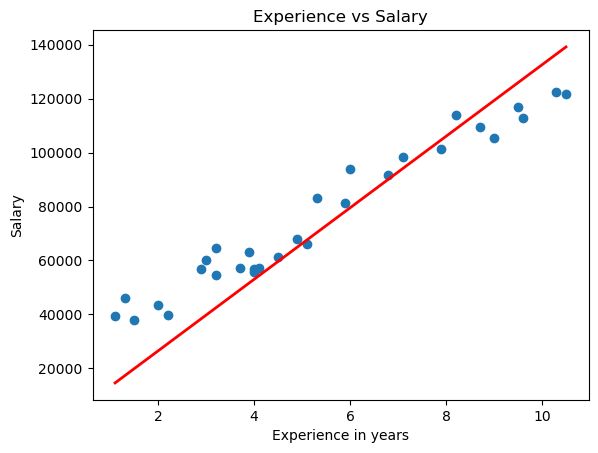

In [7]:
# create the scatterplot
plt.scatter(df["YearsExperience"], df["Salary"])

# create the regression line
# this uses df['YearsExperience'] for the x-axis and results.predict() for the y-axis
plt.plot(df['YearsExperience'], 
         results.predict(), 
         color='red', 
         linewidth=2, 
         label='Regression line'
)

# customize the plot
plt.title("Experience vs Salary")
plt.xlabel("Experience in years")
plt.ylabel("Salary")


### Logistic regression

Our dataset has two columns:

* Number of years
* Whether someone was promoted or not. 1 means yes, 0 means no

We want to ask a simple question using this data: **how does length of experience influence whether someone gets promoted or not?** Since being promoted is a yes/no question, we get to use **logistic regression**.

In [8]:
import statsmodels.formula.api as smf

#how does length of experience influence whether someone gets promoted or not?
model = smf.logit(formula='promoted ~ YearsExperience', data=df)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.635838
         Iterations 5


### How to interpret your results

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               promoted   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Oct 2024   Pseudo R-squ.:                 0.05523
Time:                        11:44:21   Log-Likelihood:                -19.075
converged:                       True   LL-Null:                       -20.190
Covariance Type:            nonrobust   LLR p-value:                    0.1353
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6752      0.826     -0.817      0.414      -2.294       0.944
YearsExperience     0.2107      0.148      1.423      0.155      -0.079       0.501
===================================================================================
"""